In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!cp '/content/drive/MyDrive/All Projects/Women Safety/chennai_data.xlsx' -d '/content/'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Load the data
data = pd.read_excel('chennai_data.xlsx')

# Display the first few rows
data.head()


,Unnamed: 0,Address,Lat,Long,Theft,Robbery,Assault,Harassment
0,0,"41 A, Fourth Main Road,Raja Annmalipuram, Chen...",13.0250,80.2575,42,32,10,3
1,1,"House No.242, Angappa Naicken Street, 3rd Floo...",13.0933,80.2842,46,17,7,1
2,2,"Shop No 18, Aarthi Chambers, 189, Anna Salai, ...",13.0715,80.2741,38,7,0,2
3,3,"D-70, 3rd Street, East Annanagar, Chennai-600102.",13.0728,80.2042,22,6,0,4
4,4,"House No.1/74(First Floor),Vivekanandhar Stree...",17.0544,80.5635,16,35,6,2


In [26]:
# Check for missing values
missing_values = data.isnull().sum()

# If there are missing values, fill them with the median of the column
if missing_values.sum() > 0:
    data.fillna(data.median(), inplace=True)


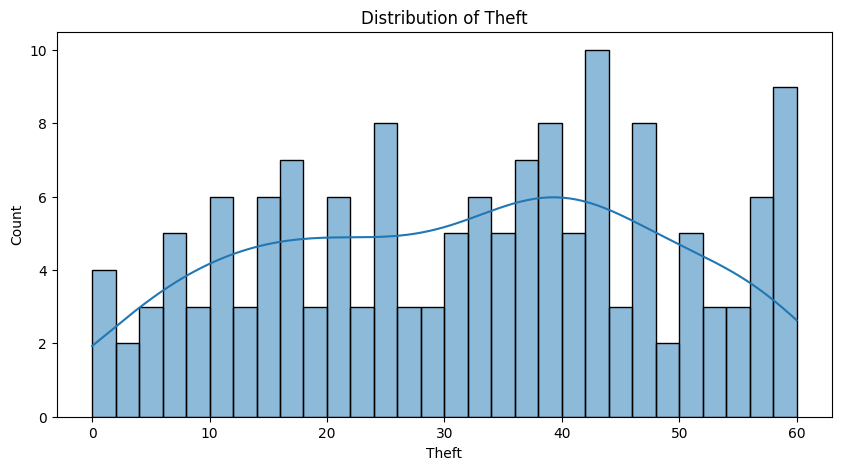

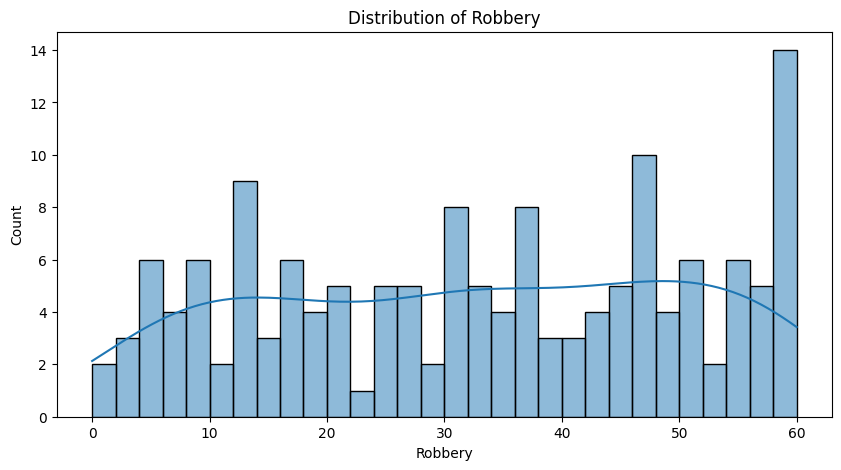

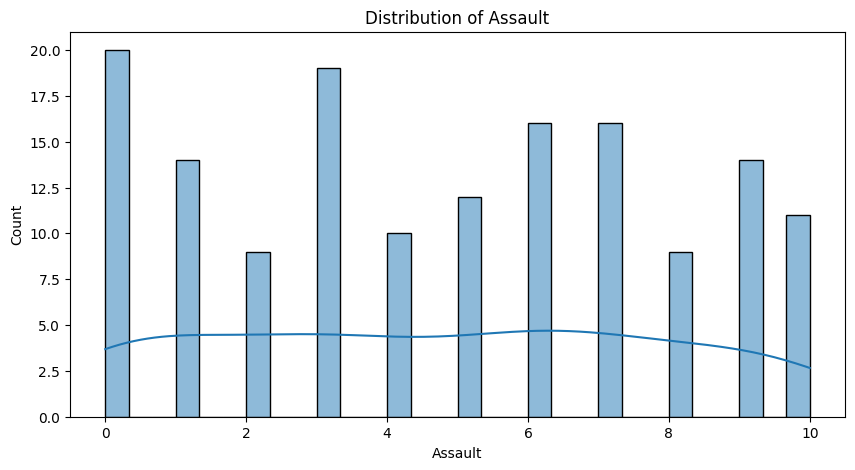

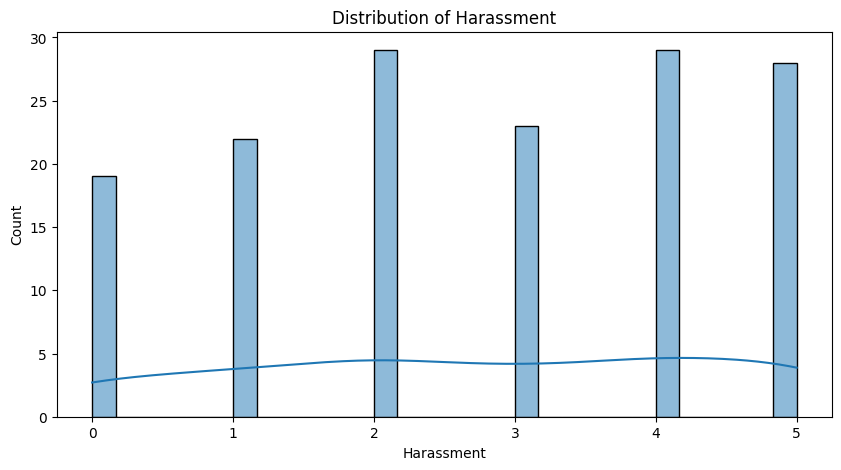

In [27]:
# Plot distributions for numeric columns
numeric_columns = ['Theft', 'Robbery', 'Assault', 'Harassment']

for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


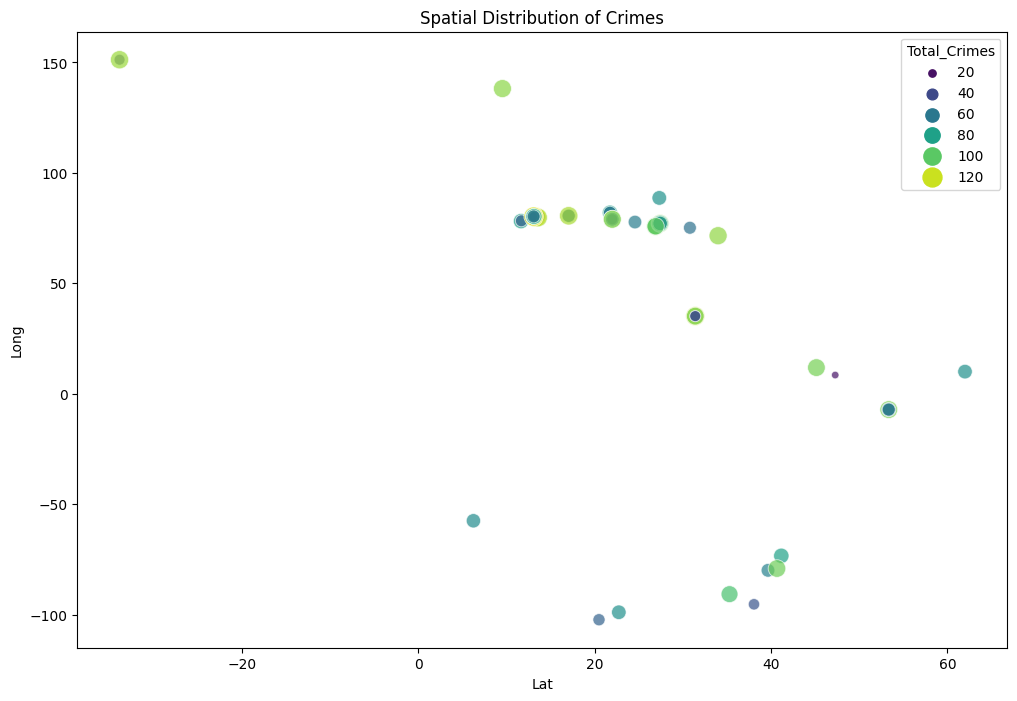

In [28]:
# Create a total crimes column
data['Total_Crimes'] = data['Theft'] + data['Robbery'] + data['Assault'] + data['Harassment']

# Scatter plot of latitude and longitude colored by total crimes
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Lat', y='Long', hue='Total_Crimes', palette='viridis', size='Total_Crimes', sizes=(20,200), alpha=0.7)
plt.title('Spatial Distribution of Crimes')
plt.show()


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Create a Total_Crimes column
data['Total_Crimes'] = data['Theft'] + data['Robbery'] + data['Assault'] + data['Harassment']

# Label locations as safe (0) or unsafe (1) based on whether they are below or above the median of Total_Crimes
median_crimes = data['Total_Crimes'].median()
data['Label'] = data['Total_Crimes'].apply(lambda x: 0 if x <= median_crimes else 1)


In [34]:
# Features and Labels
X = data[['Lat', 'Long', 'Total_Crimes']]
y = data['Label']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

In [41]:
# Predict on test set
y_pred = logreg.predict(X_test)

# Display accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(95.72222222222221, 0.5, 'Actual')

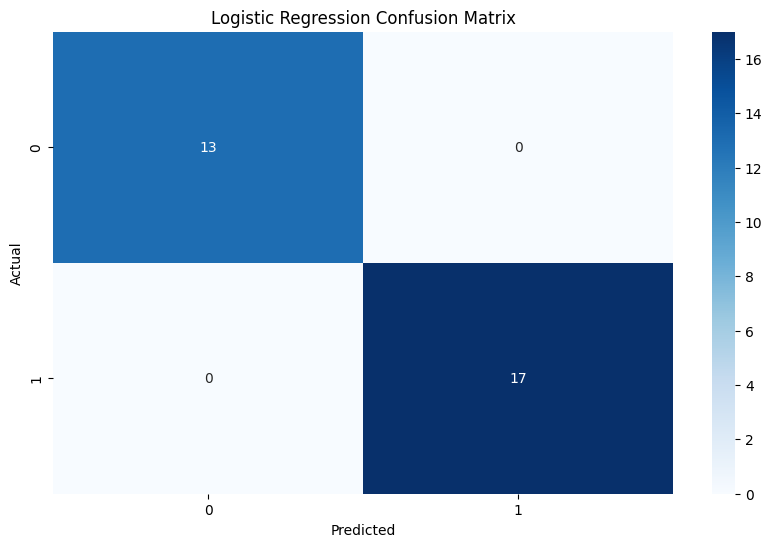

In [50]:
# Confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, logreg_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(lr_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ANN

In [60]:
from keras.models import Sequential
from keras.layers import Dense


# Neural Network
nn_model = Sequential()
nn_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(5, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=0)

nn_pred = (nn_model.predict(X_test) > 0.5).astype("int32")
nn_acc = accuracy_score(y_test, nn_pred)

print(f"Neural Network Accuracy: {nn_acc}")

1/1 [==============================] - 0s 70ms/step
Neural Network Accuracy: 0.9333333333333333


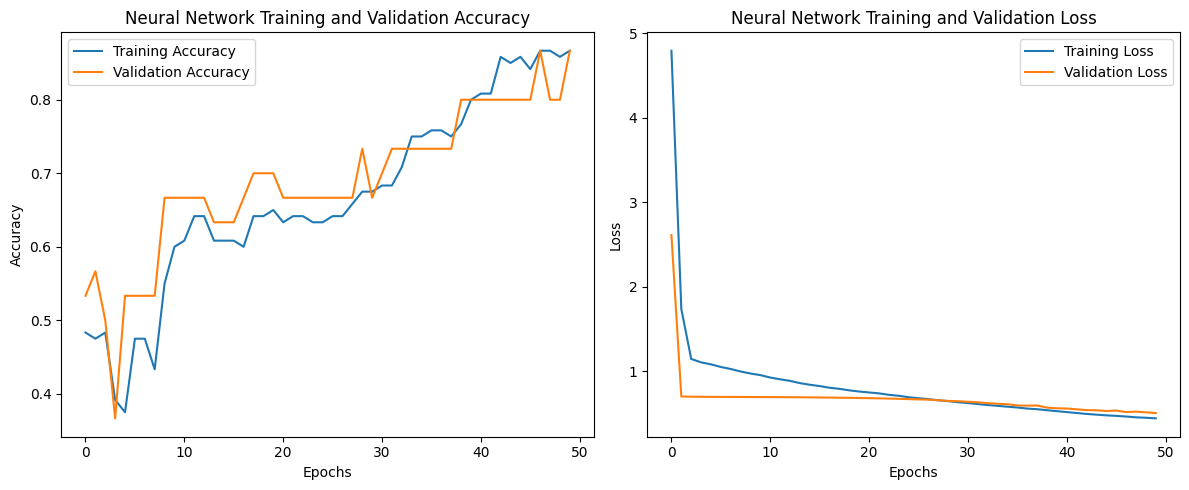

In [52]:
# Accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [56]:
# Predict on test set
y_pred = dtree.predict(X_test)

# Display accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(95.72222222222221, 0.5, 'Actual')

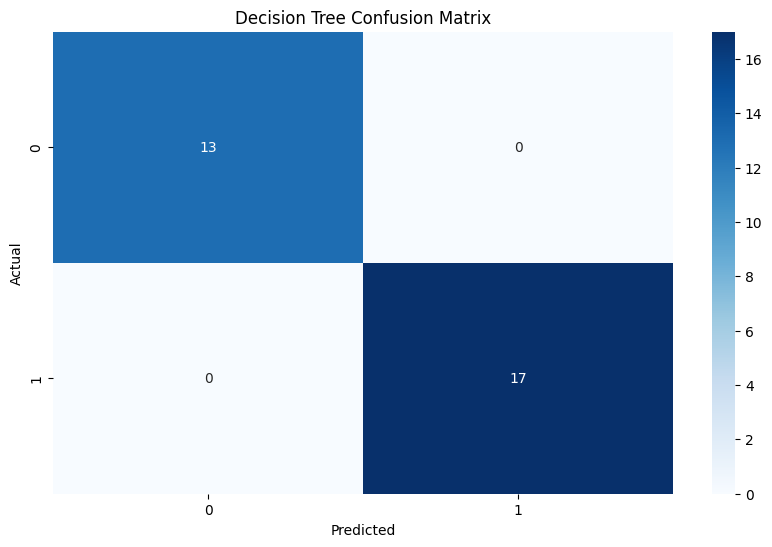

In [57]:
# Confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(dt_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')